In [45]:
# Imports
import math
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [46]:

path = 'reports/results/results.csv'
def DER_extraction(path):
    
    df = pd.read_csv (path)
    der_alloc = []
    der_rl = []
    i = 0
    for der in df['DER']:
        if i % 2 == 0:
            der_alloc.append(der)
        else :
            der_rl.append(der)
        i = i +1
    return der_alloc, der_rl
def energy_extraction(path):
    
    df = pd.read_csv (path)
    e_alloc = []
    e_rl = []
    i = 0
    for e in df['Energy']:
        if i % 2 == 0:
            e_alloc.append(e)
        else :
            e_rl.append(e)
        i = i +1
    return e_alloc, e_rl

def generate_node_counter(n):
    nodes = []
    for i in range (500,500*(n+1),500):
        nodes.append(i)
    return nodes

def SF_distribution_extraction(path):
    df = pd.read_csv (path)
    
    
der_alloc,der_rl = DER_extraction(path)
e_alloc, e_rl = energy_extraction(path)
nodes = generate_node_counter(len(der_alloc))
print(nodes)

[500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500, 7000, 7500, 8000, 8500, 9000, 9500, 10000, 10500]


In [ ]:
plt.plot(nodes,der_alloc,color='green', label = 'Alloc')
plt.plot(nodes,der_rl,color='blue', label = 'RL')
plt.legend()
plt.ylabel('DER')
plt.xlabel('Nodes')
plt.show()

In [ ]:
plt.plot(nodes,e_alloc,color='green', label = 'Alloc')
plt.plot(nodes,e_rl,color='blue', label = 'RL')
plt.legend()
plt.ylabel('Energy')
plt.xlabel('Nodes')
plt.show()

In [47]:
path = 'reports/results/sim_results-1.csv'


der_alloc,der_rl = DER_extraction(path)
print(der_alloc)
e_alloc, e_rl = energy_extraction(path)
nodes = [2000,3000,4000,5000,6000,7000,8000]


[84.43092783505155, 77.84225797942496, 72.54697937693795, 67.2400364570387, 62.7873054241597, 58.626318507482175, 54.9371269026014]


In [ ]:
plt.plot(nodes,der_alloc,color='green', label = 'Alloc')
plt.plot(nodes,der_rl,color='blue', label = 'RL')
plt.legend()
plt.ylabel('DER')
plt.xlabel('Nodes')
plt.show()

In [48]:
def bar_plot(data1,data2):
    x = np.arange(7)
    labels = ['2000','3000','4000','5000','6000','7000','8000']
    fig, ax = plt.subplots()
    ax.bar(x-0.15, data1,color='#69b3a2', width = 0.3, label = 'IoT-MAB')
    ax.bar(x+0.15, data2,color='#4374B3',width = 0.3,label ='RL')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    plt.xlabel('Number of Nodes') 
    plt.ylabel('DER (%)')
    plt.legend()
    plt.savefig('der_results.png')
    plt.show()

#bar_plot(der_alloc,der_rl)


[73.73, 68.44, 61.88, 57.25, 53.24, 48.68, 45.24]


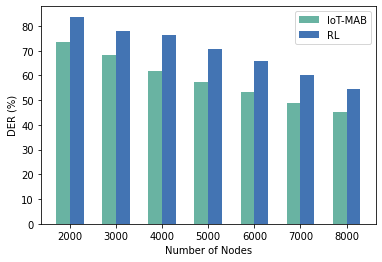

In [49]:

der_mab = [73.73,68.44,61.88,57.25,53.24,48.68,45.24]
print(der_mab)
bar_plot(der_mab,der_rl)


In [ ]:
plt.plot(nodes,e_alloc,color='green', label = 'Alloc')
plt.plot(nodes,e_rl,color='blue', label = 'RL')
plt.legend()
plt.ylabel('Energy')
plt.xlabel('Nodes')
plt.show()

[0.0, 1.0471975511965976, 2.0943951023931953, 3.141592653589793, 4.1887902047863905, 5.235987755982989, 0.0]
[40.675  18.2375 28.15    8.9625  2.55    1.425  40.675 ]


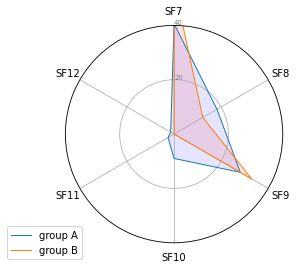

In [44]:
# Libraries



import matplotlib.pyplot as plt
import pandas as pd
from math import pi
 
# Set data
df = pd.DataFrame({
'group': ['RL','alloc'],
'SF7': [3254,4386],
'SF8': [1459,978],
'SF9': [2252,2636],
'SF10': [717,0],
'SF11': [204,0],
'SF12': [114,0]
    
})
 
# ------- PART 1: Create background
 
# number of variable
categories=list(df)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([20,40,60,80,100], ["20","40","60","80","100"], color="grey", size=7)
plt.ylim(0,40)
 

# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't make a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=df.loc[0].drop('group').values.flatten().tolist()

print(angles)
values += values[:1]
values = (np.array(values)/ 8000)*100
print(values)
ax.plot(angles, values, linewidth=1, linestyle='solid', label="group A")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
values=df.loc[1].drop('group').values.flatten().tolist()
values += values[:1]

values = (np.array(values)/ 8000) *100

ax.plot(angles, values, linewidth=1, linestyle='solid', label="group B")
ax.fill(angles, values, 'r', alpha=0.1)
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Show the graph
plt.show()